# DBSCAN Clustering

## Load Libraries and Data

In [1]:
import io
import requests
import warnings
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN, KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
import seaborn as sns

# Uncomment to run the HDBSCAN example
import hdbscan

# Suppress matplotlib deprecation warnings
warnings.filterwarnings('ignore')

# Make this notebook's output stable across runs
random_state = 1000
np.random.seed(random_state)

# Plot formatting
%matplotlib inline
sns.set()
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Generate and Visualize Data

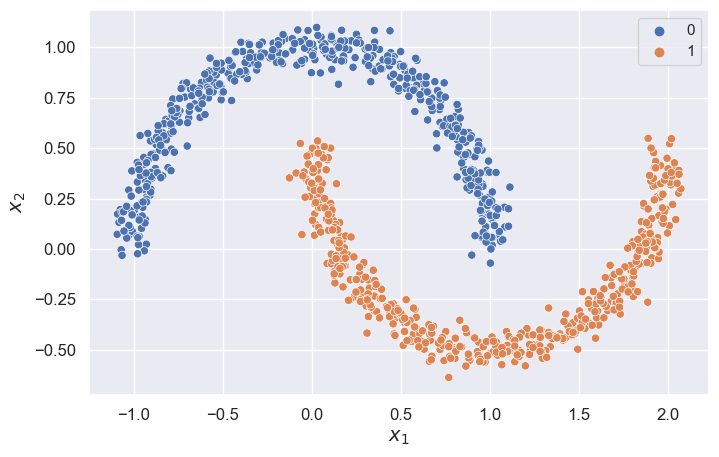

In [2]:
X, y = make_moons(n_samples=1000, noise=0.05) 

plt.subplots(figsize=(8, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.show()

## DBSCAN

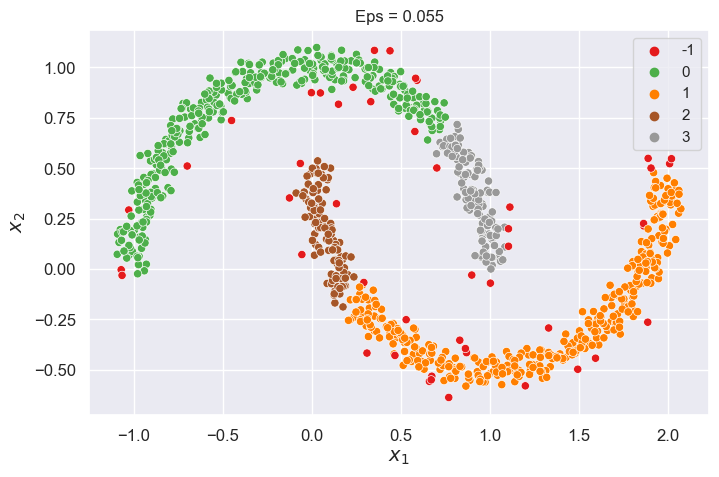

In [3]:
# Fit DBSCAN with epsilon 0.055
dbscan = DBSCAN(eps=0.055, min_samples=5)
dbscan.fit(X)

# Plot clusters
plt.subplots(figsize=(8, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=dbscan.labels_,
                palette=sns.color_palette('Set1', as_cmap=True))

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.title('Eps = 0.055')
plt.show()

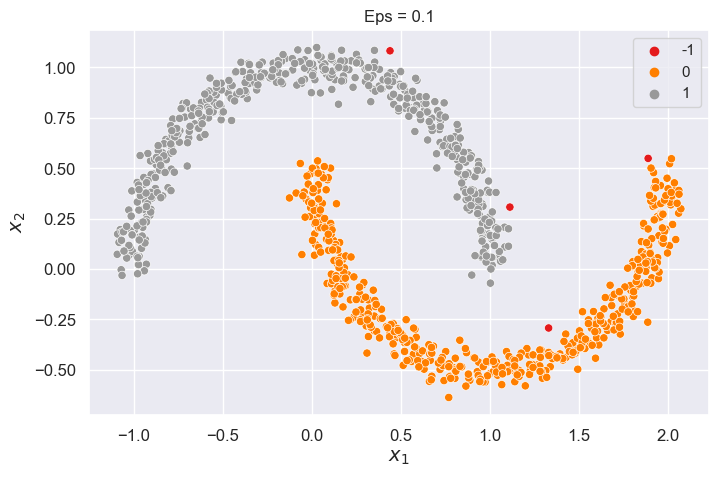

In [4]:
# Refit DBSCAN with an epsilon of 0.1
dbscan = DBSCAN(eps=0.1, min_samples=10)
dbscan.fit(X)

# Plot clusters
plt.subplots(figsize=(8, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=dbscan.labels_,
                palette=sns.color_palette('Set1', as_cmap=True))

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.title('Eps = 0.1')
plt.show()

### Exercise
Vary min_samples and observe how the assignment of anomalies changes.

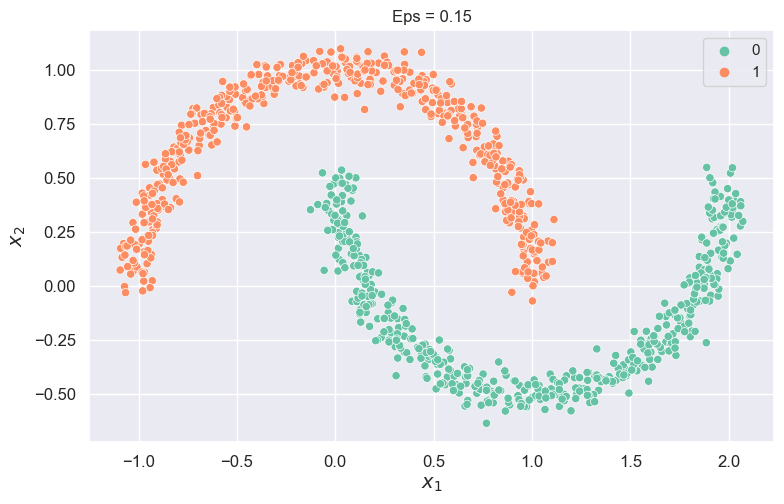

In [5]:
# Refit DBSCAN with an epsilon of 0.15
dbscan = DBSCAN(eps=0.15, min_samples=10)
dbscan.fit(X)

# Plot clusters
plt.subplots(figsize=(8, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=dbscan.labels_,
                palette=sns.color_palette('Set2', n_colors=2))

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.tight_layout()
plt.title('Eps = 0.15')
plt.show()

## K-Means for Comparison

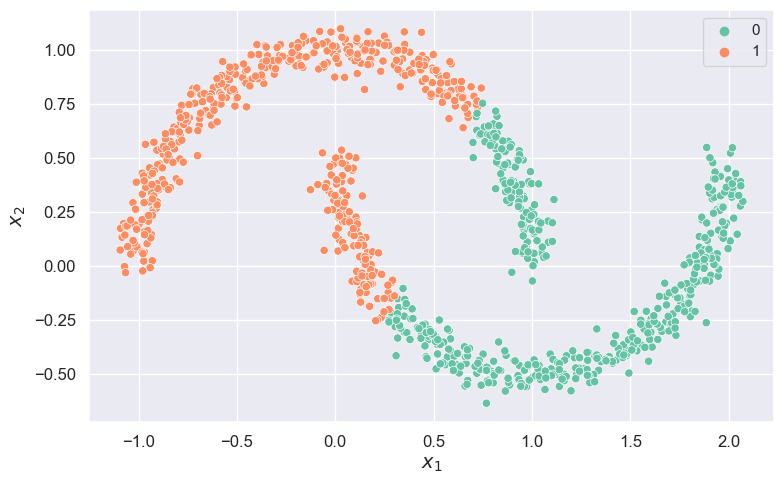

In [6]:
# Fit KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Plot clusters
plt.subplots(figsize=(8, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans.labels_,
                palette=sns.color_palette('Set2', n_colors=2))                

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.tight_layout()
plt.show()

## DBSCAN on Mall Customer Data

In [7]:
url = 'https://raw.githubusercontent.com/natecraig/aiml/main/Data/mall.csv'
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
df.head()

,ID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Cluster income and spend
X = df[['Income', 'Spend']]

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

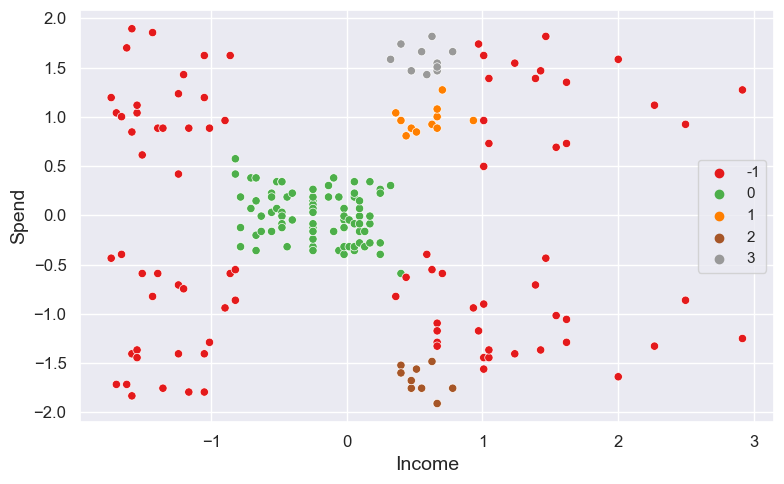

In [9]:
# Fit DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(X_scale)

# Plot clusters
plt.subplots(figsize=(8, 5))
sns.scatterplot(x=X_scale[:, 0], y=X_scale[:, 1], hue=dbscan.labels_,
                palette=sns.color_palette('Set1', as_cmap=True))

plt.xlabel('Income')
plt.ylabel('Spend')

plt.tight_layout()
plt.show()

## More Complex Clusters and HDBSCAN

In [10]:
url = 'https://raw.githubusercontent.com/natecraig/aiml/main/Data/fancy_clusters.csv'
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
X = df[['x1', 'x2']].to_numpy()

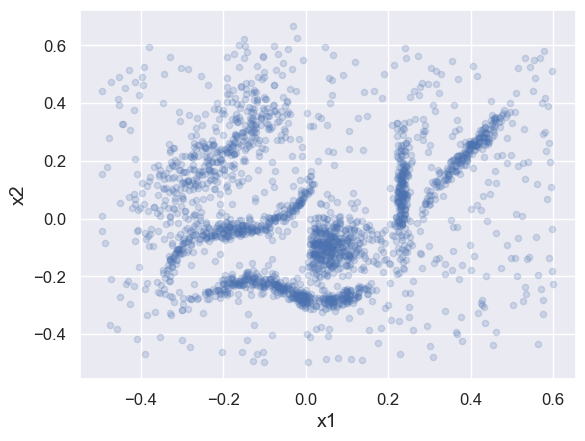

In [11]:
df.plot.scatter('x1', 'x2', alpha=0.2)
plt.show()

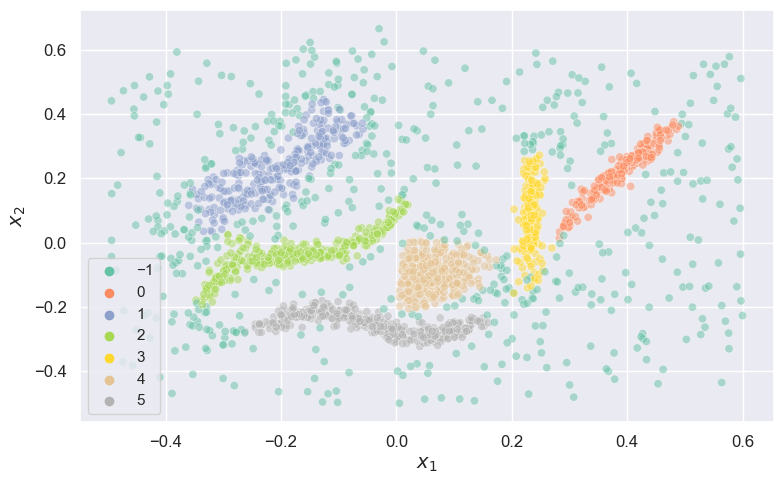

In [12]:
# Fit HDBSCAN
dbscan = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=15,
                         cluster_selection_epsilon=0.01)
dbscan.fit(X)

# Plot clusters
plt.subplots(figsize=(8, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=dbscan.labels_,
                palette=sns.color_palette('Set2', as_cmap=True),
                alpha=0.5)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.tight_layout()
plt.show()